In [21]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import scipy.stats as st
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.plotting import output_file, save

In [11]:
# read the file into a list
list_of_series_df = pd.read_csv('C:\SRC\AI\ProjectOne_Team2\Frank_playground\output_filename.csv')
display (list_of_series_df)

,country,state,county,series_Desc,series_id,filename
0,United States,TX,Collin,House Price Index,ATNHPIUS48085A,United_States_TX_Collin_House_Price_Index
1,United States,TX,Dallas,House Price Index,ATNHPIUS48113A,United_States_TX_Dallas_House_Price_Index
2,United States,TX,Denton,House Price Index,ATNHPIUS48121A,United_States_TX_Denton_House_Price_Index
3,United States,TX,Collin,Household Income,MHITX48085A052NCEN,United_States_TX_Collin_Household_Income
4,United States,TX,Dallas,Household Income,MHITX48113A052NCEN,United_States_TX_Dallas_Household_Income
5,United States,TX,Denton,Household Income,MHITX48121A052NCEN,United_States_TX_Denton_Household_Income
6,United States,TX,Collin,Resident Population,TXCOLL5POP,United_States_TX_Collin_Resident_Population
7,United States,TX,Dallas,Resident Population,TXDALL3POP,United_States_TX_Dallas_Resident_Population
8,United States,TX,Denton,Resident Population,TXDENT2POP,United_States_TX_Denton_Resident_Population


In [12]:

# read the file into a list
# for index, row in list_of_series_df.iterrows():
hpi_data='United_States_TX_Denton_House_Price_Index'
pop_data='United_States_TX_Denton_Resident_Population'
hpi_df=  pd.read_csv(f'C:\SRC\AI\ProjectOne_Team2\\resources\{hpi_data}.csv',
                    index_col='date',
                    parse_dates=True,
                    date_format='%Y-%m-%d')
pop_df=  pd.read_csv(f'C:\SRC\AI\ProjectOne_Team2\\resources\{pop_data}.csv',
                    index_col='date',
                    parse_dates=True,
                    date_format='%Y-%m-%d')
display (hpi_df.head())
display (pop_df.head())
display (hpi_df.tail())
display (pop_df.tail())
display (hpi_df.shape)
display (pop_df.shape)

,value
date,
1997-01-01,86.86
1998-01-01,90.53
1999-01-01,94.48
2000-01-01,100.00
2001-01-01,105.81


,value
date,
1997-01-01,372.612
1998-01-01,394.019
1999-01-01,416.622
2000-01-01,439.056
2001-01-01,464.919


,value
date,
2018-01-01,191.62
2019-01-01,198.90
2020-01-01,203.96
2021-01-01,232.51
2022-01-01,281.93


,value
date,
2018-01-01,858.148
2019-01-01,888.765
2020-01-01,914.398
2021-01-01,943.883
2022-01-01,977.760


(26, 1)

(26, 1)

In statistics, the strength of a correlation, measured by the correlation coefficient, indicates how closely two variables are related to each other. The correlation coefficient (often denoted as \( r \)) typically ranges from -1 to 1, where:

- **+1** indicates a perfect positive correlation: As one variable increases, the other variable increases in a perfectly linear fashion.
- **-1** indicates a perfect negative correlation: As one variable increases, the other decreases in a perfectly linear fashion.
- **0** indicates no correlation: There is no linear relationship between the variables.

### Interpretation of Correlation Values

The strength of a correlation is usually determined by the absolute value of the correlation coefficient (\(|r|\)). Here's a general guideline for interpreting the strength:

- **Very weak or no correlation**: \( |r| \leq 0.19 \)
- **Weak correlation**: \( 0.20 \leq |r| \leq 0.39 \)
- **Moderate correlation**: \( 0.40 \leq |r| \leq 0.59 \)
- **Strong correlation**: \( 0.60 \leq |r| \leq 0.79 \)
- **Very strong correlation**: \( 0.80 \leq |r| \leq 1.00 \)

### Context Matters

The interpretation of what is considered "strong" can vary by context and field of study. In fields where factors are typically less controlled and more variable, such as social sciences, a correlation coefficient of 0.6 might be considered very strong. In contrast, in fields like physics, where experiments are highly controlled, a correlation coefficient closer to 1.0 may be expected for a strong correlation.

### Practical Example

Suppose you are analyzing data where you calculated the correlation coefficient between two variables to be 0.65. According to the general guideline, this would be considered a strong correlation, meaning there is a substantial relationship between the variables, though the relationship is not perfect.

### Considerations Beyond Correlation

- **Causation**: Correlation does not imply causation. Just because two variables are correlated does not mean one causes the other to change. Other underlying factors might influence both variables.
- **Outliers**: Correlation can be heavily influenced by outliers. It’s important to analyze data plots or perform additional statistics to understand the data fully.
- **Linear vs. Non-linear Relationships**: The Pearson correlation coefficient measures the strength of a linear relationship. If the relationship is non-linear, even a strong non-linear relationship may have a low Pearson correlation coefficient.

### Conclusion

A "strong" correlation typically refers to a correlation coefficient between 0.60 and 0.79. However, understanding the practical implications of this relationship requires a careful consideration of the broader context, including the nature of the data and the specific conditions of the field of study.

In [13]:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
hpi = hpi_df.loc[:,'value']
pop = pop_df.loc[:,'value']
correlation = st.pearsonr(hpi,pop)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.9


The correlation between both factors is 0.9


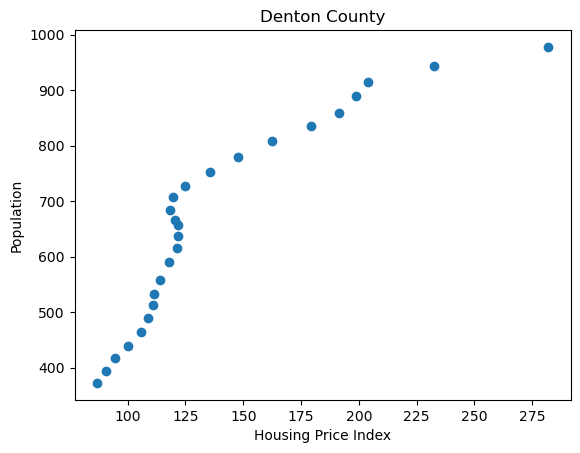

In [18]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(hpi,pop)
plt.xlabel('Housing Price Index')
plt.ylabel('Population')
plt.title('Denton County')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [26]:
# Merge POP and HPI

hpi_pop_df=pd.concat([hpi_df,pop_df], axis=1)
hpi_pop_df.columns.values[0] = 'HPI'
hpi_pop_df.columns.values[1] = 'POP'
# display (hpi_pop_df.info())
# display (hpi_df.info())
hpi_pop_plot=hpi_pop_df.hvplot().opts\
                        (xformatter=DatetimeTickFormatter(years='%Y'),
                        ylim=(0, 3000),
                        title='Denton County')

display (hpi_pop_plot)

:NdOverlay   [Variable]
   :Curve   [date]   (value)